# Python Assignment

# Data Manipulation 

---------------------------------------------------
Clean and merge LoanData , ProductDets and Branchdets

In [1]:
import pandas as pd
import numpy as np

In [2]:
customer = pd.read_excel('PythonData.xlsx',sheet_name= 'LoanData' )

In [3]:
customer.duplicated().sum()

0

In [4]:
product = pd.read_excel('PythonData.xlsx',sheet_name= 'ProductDets' )
product.duplicated().sum()

10

In [5]:
branch = pd.read_excel('PythonData.xlsx',sheet_name= 'BranchDets' )

In [6]:
customer.head()

,CODE,CUSTID,LOANID,LOANAMT,DISB_DATE,AGE
0,2,187,2086,32000.0,2024-05-25,31
1,5,124,2048,145000.0,2024-04-05,40
2,1,131,2008,99000.0,2024-07-06,32
3,2,148,2100,151000.0,2024-09-14,34
4,2,195,2051,136000.0,2024-09-05,34


In [7]:
product.head()

,LOANID,PRODUCT
0,2006,Gold Loan
1,2012,Credit Card
2,2014,Loan Against Property
3,2080,Personal Loan
4,2075,Loan Against Property


In [8]:
branch.head()

,BRANCH_CODE,BRANCH_STATE
0,1,Maharashtra
1,2,Rajasthan
2,3,Tamil Nadu
3,4,West Bengal
4,5,Punjab


In [11]:
df = pd.merge(customer, product, on = 'LOANID', how = 'right' )
df.head()

,CODE,CUSTID,LOANID,LOANAMT,DISB_DATE,AGE,PRODUCT
0,2,155,2006,140000.0,2024-06-14,40,Gold Loan
1,4,108,2012,65000.0,2024-07-19,36,Credit Card
2,2,114,2014,90000.0,2024-09-04,35,Loan Against Property
3,5,131,2080,126000.0,2024-05-02,30,Personal Loan
4,5,148,2075,118000.0,2024-07-24,37,Loan Against Property


In [9]:
df = pd.merge(customer, product, on = 'LOANID', how = 'left' )

In [10]:
df.head()

,CODE,CUSTID,LOANID,LOANAMT,DISB_DATE,AGE,PRODUCT
0,2,187,2086,32000.0,2024-05-25,31,Loan Against Property
1,5,124,2048,145000.0,2024-04-05,40,Personal Loan
2,1,131,2008,99000.0,2024-07-06,32,Gold Loan
3,2,148,2100,151000.0,2024-09-14,34,Credit Card
4,2,195,2051,136000.0,2024-09-05,34,Gold Loan


In [11]:
df.shape

(110, 7)

In [12]:
df.duplicated().sum()

10

In [13]:
df =df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 108
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODE       100 non-null    int64  
 1   CUSTID     100 non-null    int64  
 2   LOANID     100 non-null    int64  
 3   LOANAMT    100 non-null    float64
 4   DISB_DATE  100 non-null    object 
 5   AGE        100 non-null    int64  
 6   PRODUCT    100 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.2+ KB


In [16]:
import datetime

df['DISB_DATE'] = pd.to_datetime(df['DISB_DATE'])

In [17]:
df.dtypes

CODE                  int64
CUSTID                int64
LOANID                int64
LOANAMT             float64
DISB_DATE    datetime64[ns]
AGE                   int64
PRODUCT              object
dtype: object

In [18]:
df.head()

,CODE,CUSTID,LOANID,LOANAMT,DISB_DATE,AGE,PRODUCT
0,2,187,2086,32000.0,2024-05-25,31,Loan Against Property
1,5,124,2048,145000.0,2024-04-05,40,Personal Loan
2,1,131,2008,99000.0,2024-07-06,32,Gold Loan
3,2,148,2100,151000.0,2024-09-14,34,Credit Card
4,2,195,2051,136000.0,2024-09-05,34,Gold Loan


In [19]:
df.shape

(100, 7)

In [20]:
df.isnull().sum()

CODE         0
CUSTID       0
LOANID       0
LOANAMT      0
DISB_DATE    0
AGE          0
PRODUCT      0
dtype: int64

In [21]:
df_merge = pd.merge(df , branch, left_on = 'CODE', right_on= 'BRANCH_CODE')

In [22]:
df_merge.head()

,CODE,CUSTID,LOANID,LOANAMT,DISB_DATE,AGE,PRODUCT,BRANCH_CODE,BRANCH_STATE
0,2,187,2086,32000.0,2024-05-25,31,Loan Against Property,2,Rajasthan
1,2,148,2100,151000.0,2024-09-14,34,Credit Card,2,Rajasthan
2,2,195,2051,136000.0,2024-09-05,34,Gold Loan,2,Rajasthan
3,2,153,2069,116000.0,2024-05-31,29,Home Loan,2,Rajasthan
4,2,133,2015,71000.0,2024-06-18,31,Gold Loan,2,Rajasthan


In [23]:
df.describe()

,CODE,CUSTID,LOANID,LOANAMT,DISB_DATE,AGE
count,100.000000,100.000000,100.000000,1.000000e+02,100,100.000000
mean,2.890000,146.780000,2050.500000,1.100210e+06,2024-07-06 22:04:48,35.110000
min,1.000000,101.000000,2001.000000,-3.000000e+04,2024-04-01 00:00:00,17.000000
25%,2.000000,120.750000,2025.750000,6.800000e+04,2024-05-30 12:00:00,32.000000
50%,3.000000,148.000000,2050.500000,1.030000e+05,2024-07-11 12:00:00,34.000000
75%,4.000000,169.250000,2075.250000,1.362500e+05,2024-08-14 12:00:00,38.000000
max,5.000000,198.000000,2100.000000,1.000000e+08,2024-09-30 00:00:00,57.000000
std,1.503498,28.112537,29.011492,9.989997e+06,NaN,5.658452


In [24]:
df_merge.shape

(100, 9)

In [25]:
df_merge.duplicated().sum()

0

In [26]:
df_merge.isnull().sum()

CODE            0
CUSTID          0
LOANID          0
LOANAMT         0
DISB_DATE       0
AGE             0
PRODUCT         0
BRANCH_CODE     0
BRANCH_STATE    0
dtype: int64

In [27]:
df_merge['PRODUCT'].value_counts()

PRODUCT
Loan Against Property    24
Personal Loan            22
Gold Loan                19
Credit Card              18
Home Loan                17
Name: count, dtype: int64

# SQL Queries

In [28]:
df_merge.columns

Index(['CODE', 'CUSTID', 'LOANID', 'LOANAMT', 'DISB_DATE', 'AGE', 'PRODUCT',
       'BRANCH_CODE', 'BRANCH_STATE'],
      dtype='object')

In [29]:
#Write a query to find the maximum loan amount (LOANAMT) for each product in the dataset.
df_merge.groupby(df_merge['PRODUCT'])['LOANAMT'].max()

PRODUCT
Credit Card                 218000.0
Gold Loan                100000000.0
Home Loan                   231000.0
Loan Against Property       181000.0
Personal Loan               181000.0
Name: LOANAMT, dtype: float64

In [30]:
#Total Loan Amount per Branch
df_merge.groupby(df_merge['BRANCH_STATE'])['LOANAMT'].sum()

BRANCH_STATE
Maharashtra    102145000.0
Punjab           2373000.0
Rajasthan        2413000.0
Tamil Nadu       1816000.0
West Bengal      1274000.0
Name: LOANAMT, dtype: float64

In [31]:
#Average Loan Amount for Customers Aged Over 30
df_merge[df_merge['AGE'] > 30]['LOANAMT'].mean()

1306506.0240963856

In [32]:
#Filter Loans Disbursed After June 2024
df_merge['month'] = df['DISB_DATE'].dt.month
df_merge['year'] = df['DISB_DATE'].dt.year
df_merge['day'] = df['DISB_DATE'].dt.day
df_merge[df_merge['DISB_DATE'] > '26-06-2024']

,CODE,CUSTID,LOANID,LOANAMT,DISB_DATE,AGE,PRODUCT,BRANCH_CODE,BRANCH_STATE,month,year,day
1,2,148,2100,151000.0,2024-09-14,34,Credit Card,2,Rajasthan,4.0,2024.0,5.0
2,2,195,2051,136000.0,2024-09-05,34,Gold Loan,2,Rajasthan,7.0,2024.0,6.0
7,2,120,2060,36000.0,2024-07-09,29,Personal Loan,2,Rajasthan,7.0,2024.0,17.0
9,2,130,2049,159000.0,2024-06-27,40,Loan Against Property,2,Rajasthan,6.0,2024.0,5.0
10,2,107,2019,111000.0,2024-07-23,49,Credit Card,2,Rajasthan,7.0,2024.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,196,2095,120000.0,2024-08-30,36,Personal Loan,3,Tamil Nadu,9.0,2024.0,30.0
96,3,167,2032,181000.0,2024-08-02,34,Personal Loan,3,Tamil Nadu,7.0,2024.0,24.0
97,3,194,2042,104000.0,2024-08-16,39,Loan Against Property,3,Tamil Nadu,9.0,2024.0,15.0
98,3,198,2068,127000.0,2024-09-17,33,Gold Loan,3,Tamil Nadu,8.0,2024.0,16.0


In [33]:
#Count of Each Product Type
df_merge['PRODUCT'].value_counts()

PRODUCT
Loan Against Property    24
Personal Loan            22
Gold Loan                19
Credit Card              18
Home Loan                17
Name: count, dtype: int64

In [34]:
#Find Loans Disbursed in a Specific Month (e.g., September 2024)
df_merge[df_merge['month'] == 9]

,CODE,CUSTID,LOANID,LOANAMT,DISB_DATE,AGE,PRODUCT,BRANCH_CODE,BRANCH_STATE,month,year,day
3,2,153,2069,116000.0,2024-05-31,29,Home Loan,2,Rajasthan,9.0,2024.0,14.0
4,2,133,2015,71000.0,2024-06-18,31,Gold Loan,2,Rajasthan,9.0,2024.0,5.0
15,2,125,2055,67000.0,2024-08-19,34,Personal Loan,2,Rajasthan,9.0,2024.0,14.0
27,5,150,2021,147000.0,2024-04-27,28,Credit Card,5,Punjab,9.0,2024.0,17.0
29,5,174,2077,59000.0,2024-09-19,33,Gold Loan,5,Punjab,9.0,2024.0,19.0
36,5,113,2092,126000.0,2024-09-24,36,Loan Against Property,5,Punjab,9.0,2024.0,2.0
40,5,175,2076,91000.0,2024-07-16,37,Loan Against Property,5,Punjab,9.0,2024.0,4.0
47,5,178,2039,137000.0,2024-08-09,34,Personal Loan,5,Punjab,9.0,2024.0,24.0
62,1,146,2045,29000.0,2024-09-13,37,Credit Card,1,Maharashtra,9.0,2024.0,1.0
67,1,101,2001,100000000.0,2024-05-23,57,Gold Loan,1,Maharashtra,9.0,2024.0,26.0


In [35]:
#Calculate the Loan-to-Age Ratio
df_merge['loanratio'] = df_merge['LOANAMT']/ df_merge['AGE']
df_merge['loanratio']

0     1032.258065
1     4441.176471
2     4000.000000
3     4000.000000
4     2290.322581
         ...     
95    3333.333333
96    5323.529412
97    2666.666667
98    3848.484848
99    1131.578947
Name: loanratio, Length: 100, dtype: float64

In [36]:
#Identify Customers with Multiple Loans
df["CUSTID"].value_counts()[df["CUSTID"].value_counts() > 1]

CUSTID
174    4
164    4
187    3
113    3
161    3
121    3
124    3
148    3
119    3
188    2
155    2
150    2
180    2
196    2
175    2
165    2
168    2
105    2
125    2
130    2
137    2
116    2
131    2
118    2
120    2
108    2
173    2
136    2
190    2
Name: count, dtype: int64

In [37]:
#Branch with Highest Average Loan Amount
df_merge.groupby("BRANCH_CODE")["LOANAMT"].mean().idxmax()

1

In [38]:
#Find All Gold Loans and Sort by Loan Amount
df_filter =df_merge[df_merge['PRODUCT'] == 'Gold Loan']
df_filter.sort_values(by ='LOANAMT', ascending = False )

,CODE,CUSTID,LOANID,LOANAMT,DISB_DATE,AGE,PRODUCT,BRANCH_CODE,BRANCH_STATE,month,year,day,loanratio
67,1,101,2001,100000000.0,2024-05-23,57,Gold Loan,1,Maharashtra,9.0,2024.0,26.0,1.754386e+06
58,1,130,2046,190000.0,2024-08-22,32,Gold Loan,1,Maharashtra,NaN,NaN,NaN,5.937500e+03
94,3,155,2043,174000.0,2024-07-04,31,Gold Loan,3,Tamil Nadu,5.0,2024.0,23.0,5.612903e+03
13,2,155,2006,140000.0,2024-06-14,40,Gold Loan,2,Rajasthan,8.0,2024.0,12.0,3.500000e+03
2,2,195,2051,136000.0,2024-09-05,34,Gold Loan,2,Rajasthan,7.0,2024.0,6.0,4.000000e+03
98,3,198,2068,127000.0,2024-09-17,33,Gold Loan,3,Tamil Nadu,8.0,2024.0,16.0,3.848485e+03
68,1,150,2029,126000.0,2024-07-24,47,Gold Loan,1,Maharashtra,8.0,2024.0,20.0,2.680851e+03
39,5,169,2009,114000.0,2024-06-13,25,Gold Loan,5,Punjab,7.0,2024.0,20.0,4.560000e+03
5,2,110,2053,102000.0,2024-05-24,29,Gold Loan,2,Rajasthan,6.0,2024.0,5.0,3.517241e+03
49,1,131,2008,99000.0,2024-07-06,32,Gold Loan,1,Maharashtra,7.0,2024.0,5.0,3.093750e+03


In [39]:
#Calculate Loan Amount Range (Min and Max) by Product
df_merge.groupby(df_merge['PRODUCT'])['LOANAMT'].agg(['min', 'max'])

,min,max
PRODUCT,,
Credit Card,-30000.0,218000.0
Gold Loan,59000.0,100000000.0
Home Loan,-7000.0,231000.0
Loan Against Property,16000.0,181000.0
Personal Loan,21000.0,181000.0


In [40]:
#Filter and Show Unique Branch States
df_merge['BRANCH_STATE'].unique()

array(['Rajasthan', 'Punjab', 'Maharashtra', 'West Bengal', 'Tamil Nadu'],
      dtype=object)

In [41]:
df.columns

Index(['CODE', 'CUSTID', 'LOANID', 'LOANAMT', 'DISB_DATE', 'AGE', 'PRODUCT'], dtype='object')

In [42]:
#Identify the Youngest Customer Taking a Home Loan
df_merge[df_merge['PRODUCT'] == 'Home Loan']['AGE'].min()

24

In [43]:
#Find the Loan Amount for Each Customer ID
df.groupby('CUSTID')['LOANAMT'].sum()

CUSTID
101    100000000.0
102        96000.0
105       127000.0
107       111000.0
108       172000.0
109        83000.0
110       102000.0
112        57000.0
113       335000.0
114        90000.0
115        75000.0
116       188000.0
117       168000.0
118       234000.0
119       274000.0
120       179000.0
121       309000.0
123       144000.0
124       379000.0
125       138000.0
127        47000.0
130       349000.0
131       225000.0
132        90000.0
133        71000.0
134        14000.0
136       163000.0
137       104000.0
140       -30000.0
145        69000.0
146        29000.0
148       320000.0
149        -3000.0
150       273000.0
153       116000.0
155       314000.0
158       181000.0
160        86000.0
161       259000.0
162       118000.0
164       360000.0
165       180000.0
166        56000.0
167       181000.0
168       175000.0
169       114000.0
170       147000.0
173       171000.0
174       447000.0
175       150000.0
178       137000.0
180       361000.0
187  

In [44]:
df_merge[df_merge['LOANAMT'] >= 90000 ]['AGE']

1     34
2     34
3     29
5     29
6     38
      ..
94    31
95    36
96    34
97    39
98    33
Name: AGE, Length: 62, dtype: int64

In [45]:
df[df['PRODUCT'] == 'Gold Loan']

,CODE,CUSTID,LOANID,LOANAMT,DISB_DATE,AGE,PRODUCT
2,1,131,2008,99000.0,2024-07-06,32,Gold Loan
4,2,195,2051,136000.0,2024-09-05,34,Gold Loan
8,2,133,2015,71000.0,2024-06-18,31,Gold Loan
12,2,110,2053,102000.0,2024-05-24,29,Gold Loan
27,5,125,2063,71000.0,2024-09-17,35,Gold Loan
29,5,174,2077,59000.0,2024-09-19,33,Gold Loan
41,2,155,2006,140000.0,2024-06-14,40,Gold Loan
48,5,113,2067,91000.0,2024-06-14,32,Gold Loan
53,1,189,2026,85000.0,2024-08-01,33,Gold Loan
55,1,130,2046,190000.0,2024-08-22,32,Gold Loan


In [46]:
df['LOANAMT'].max()

100000000.0

In [47]:
df_merge.columns

Index(['CODE', 'CUSTID', 'LOANID', 'LOANAMT', 'DISB_DATE', 'AGE', 'PRODUCT',
       'BRANCH_CODE', 'BRANCH_STATE', 'month', 'year', 'day', 'loanratio'],
      dtype='object')

# Data Analysis

--------------------------------------------------------
1. What is the Month On Month trend of Disbursed Amount? (Visualize)
2. Visualize the relationship between Age and Disbursed Amount.
3. Find top 5 products with highest disbursed amount for each branch state



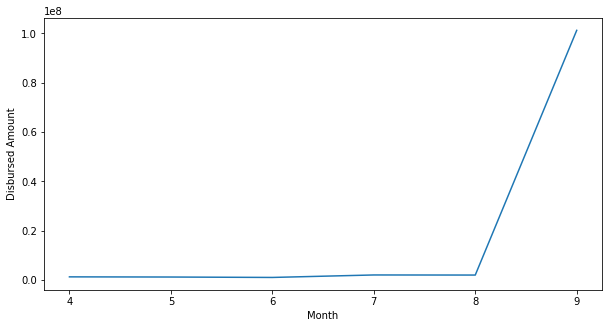

In [48]:
# What is the Month On Month trend of Disbursed Amount? (Visualize)
df_merge['DISB_DATE'] = pd.to_datetime(df['DISB_DATE'])
mo_disburse = df_merge.groupby('month')['LOANAMT'].sum()

import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
mo_disburse.plot(kind = 'line')
plt.xlabel('Month')
plt.ylabel('Disbursed Amount')
plt.show()

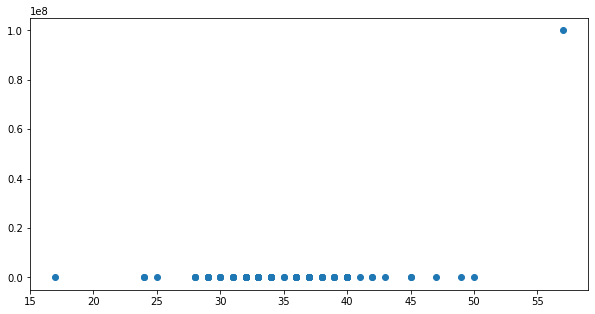

In [49]:
#Visualize the relationship between Age and Disbursed Amount.
plt.figure(figsize = (10,5))
plt.scatter(df_merge['AGE'], df_merge['LOANAMT'] )
plt.show()

In [50]:
# Find top 5 products with highest disbursed amount for each branch state
df_merge.groupby(['BRANCH_STATE', 'PRODUCT'])['LOANAMT'].max(5)

BRANCH_STATE  PRODUCT              
Maharashtra   Credit Card                 170000.0
              Gold Loan                100000000.0
              Home Loan                   140000.0
              Loan Against Property       181000.0
              Personal Loan               144000.0
Punjab        Credit Card                 174000.0
              Gold Loan                   114000.0
              Home Loan                   114000.0
              Loan Against Property       126000.0
              Personal Loan               169000.0
Rajasthan     Credit Card                 151000.0
              Gold Loan                   140000.0
              Home Loan                   129000.0
              Loan Against Property       159000.0
              Personal Loan                96000.0
Tamil Nadu    Credit Card                 152000.0
              Gold Loan                   174000.0
              Home Loan                   231000.0
              Loan Against Property       1250

# Statistical Analysis
-------------------------------------------------------
1. Find the distribution of Age and Disbursed Amount'
2. Find the outlier in the data.  
3. Find if there is any correlation between the variables using Heatmap
4. Build a simple model to predict the disbursed amount based on other attributes.

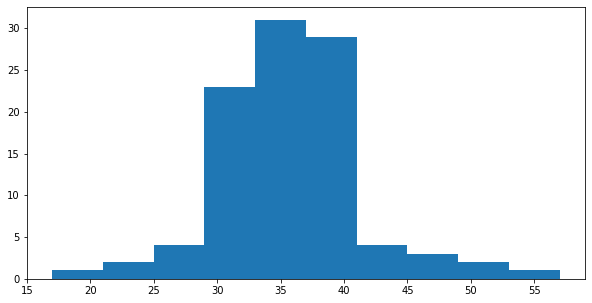

In [51]:
#Find the distribution of Age and Disbursed Amount'

plt.figure(figsize = (10,5))
plt.hist(df_merge['AGE'], bins = 10)
plt.show()

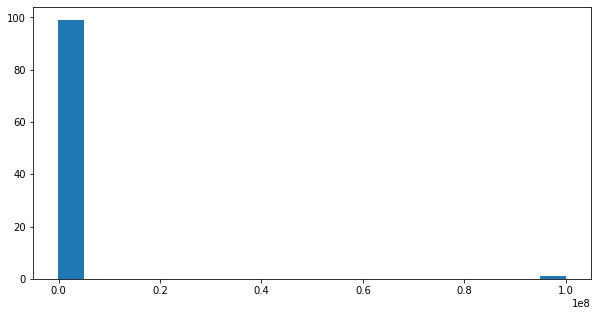

In [52]:
plt.figure(figsize = (10,5))
plt.hist(df_merge['LOANAMT'], bins = 20)
plt.show()

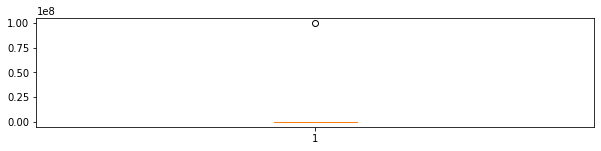

In [53]:
#2. Find the outlier in the data.  
plt.figure(figsize = (10,2))
plt.boxplot(x = df_merge['LOANAMT'])
plt.show()

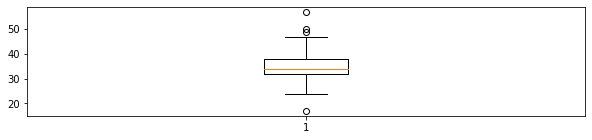

In [54]:
plt.figure(figsize = (10,2))
plt.boxplot(x = df_merge['AGE'])
plt.show()

In [55]:
#IQR 

q1 = df_merge['LOANAMT'].quantile(0.25)
q3 = df_merge['LOANAMT'].quantile(0.75)

IQR = q3 - q1
o = df_merge[(df_merge['LOANAMT'] >=  (q1 - 1.5* IQR) )   & (df_merge['LOANAMT'] <= (q3 +1.5 *IQR))]
len(o)

99

In [56]:
q1 = df_merge['AGE'].quantile(0.25)
q3 = df_merge['AGE'].quantile(0.75)

IQR = q3 - q1
o = df_merge[(df_merge['AGE'] >=  (q1 - 1.5* IQR) )   & (df_merge['AGE'] <= (q3 +1.5 *IQR))]
len(o)

96

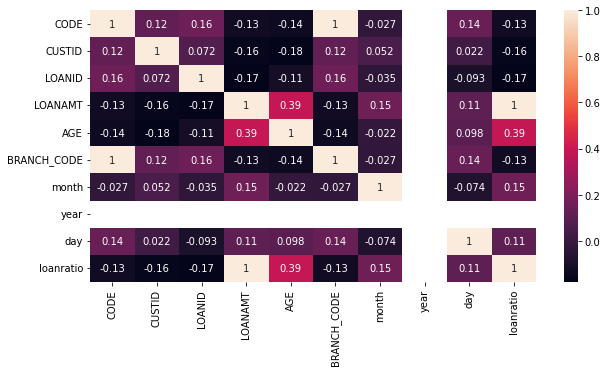

In [57]:
#3. Find if there is any correlation between the variables using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

n_columns = df_merge.select_dtypes(include=['number'])

cor_mat = n_columns.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(cor_mat, annot=True)
plt.show()


In [58]:
#4. Build a simple model to predict the disbursed amount based on other attributes.
df_merge.columns

Index(['CODE', 'CUSTID', 'LOANID', 'LOANAMT', 'DISB_DATE', 'AGE', 'PRODUCT',
       'BRANCH_CODE', 'BRANCH_STATE', 'month', 'year', 'day', 'loanratio'],
      dtype='object')

In [170]:
df_m = df_merge.copy()

In [171]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [172]:
c = ['CODE', 'CUSTID', 'LOANID', 'BRANCH_CODE', 'DISB_DATE', 'year']
df_m = df_m.drop(columns = c)

In [173]:
# Numerical value
df_m['AGE'] = MinMaxScaler().fit_transform(df_m[['AGE']])
df_m['loanratio'] = MinMaxScaler().fit_transform(df_m[['loanratio']])


#categorical value

df_m['PRODUCT'] = LabelEncoder().fit_transform(df_m[['PRODUCT']])
df_m['BRANCH_STATE'] = LabelEncoder().fit_transform(df_m[['BRANCH_STATE']])
df_m['month'] = LabelEncoder().fit_transform(df_m[['month']])

c:\users\nishu\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\nishu\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\nishu\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [174]:
df_m.head()

,LOANAMT,AGE,PRODUCT,BRANCH_STATE,month,day,loanratio
0,32000.0,0.350,3,2,1,25.0,0.001063
1,151000.0,0.425,0,2,0,5.0,0.003005
2,136000.0,0.425,1,2,3,6.0,0.002754
3,116000.0,0.300,2,2,5,14.0,0.002754
4,71000.0,0.350,1,2,5,5.0,0.001780


In [175]:
df_m.isnull().sum()
df_m['day'] = df_m['day'].fillna(df_m['day'].mode()[0])

In [179]:
x = df_m.drop('LOANAMT', axis = 1)
y = df_m['LOANAMT']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [180]:
model_linear_s = LinearRegression()

model_linear_s.fit(x_train, y_train)

y_pred = model_linear_s.predict(x_test)
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = np.sqrt(mse_linear)
R_2_s_linear = r2_score(y_test, y_pred)
r2_train_la_s = r2_score(y_train, y_train_pred)

print(R_2_s_linear)
print(mse_linear)
print(r2_train_la_s)

0.3077561979103879
1176625827.1162713
0.9999905313560483


In [181]:
#overfitted trainig set high n testing set low